#### Importing Libraries

In [1]:
import numpy as np
#numpy aliased as np

import pandas as pd
#pandas aliased as pd

import matplotlib.pyplot as plt
#matplotlib.pyplot aliased as plt

import seaborn as sns
#seaborn aliased as sns

import pickle as pk
#importing pickle and aliased as pk

#importing warning module for ignoring warning messages
import warnings
warnings.filterwarnings('ignore')

#### Loading Data using pandas library

In [2]:
#loading data using pandas library
df = pd.read_csv("Amazing mart.csv")

#Showing Top 5 rows
df.head()

,Unnamed: 0,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Days to Ship,Product Name,Discount,Actual Discount,Sales,Profit,Quantity,Category,Sub-Category
0,0,BN-2011-7407039,1-1-13,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,Stockholm,4,"Enermax Note Cards, Premium",0.5,22.5,45,-26,3,Office Supplies,Paper
1,1,AZ-2011-9050313,1-3-13,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,England,4,"Dania Corner Shelving, Traditional",0.0,0.0,854,290,7,Furniture,Bookcases
2,2,AZ-2011-6674300,1-4-13,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,Auvergne-Rhône-Alpes,4,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,21,3,Office Supplies,Art
3,3,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Boston Markers, Easy-Erase",0.5,13.5,27,-22,2,Office Supplies,Art
4,4,BN-2011-2819714,1-4-13,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,England,5,"Eldon Folders, Single Width",0.5,8.5,17,-1,2,Office Supplies,Storage


#### Checking data types of Columns

In [3]:
#Checking data types of columns in dataframe
df.dtypes

Unnamed: 0           int64
Order ID            object
Order Date          object
Customer Name       object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Ship Mode           object
State               object
Days to Ship         int64
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Profit               int64
Quantity             int64
Category            object
Sub-Category        object
dtype: object

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [5]:
#Checking data types of columns in dataframe
df.dtypes

Unnamed: 0                  int64
Order ID                   object
Order Date         datetime64[ns]
Customer Name              object
City                       object
Country                    object
Region                     object
Segment                    object
Ship Date                  object
Ship Mode                  object
State                      object
Days to Ship                int64
Product Name               object
Discount                  float64
Actual Discount           float64
Sales                       int64
Profit                      int64
Quantity                    int64
Category                   object
Sub-Category               object
dtype: object

In [6]:
df.insert(loc= df.columns.get_loc('Order Date') + 1, column = 'Order Year', value = (df['Order Date'].dt.year) )
df.insert(loc= df.columns.get_loc('Product Name') + 1, column = 'Product Sell Price', value = np.round((df['Sales']/df['Quantity']),2) )
df.insert(loc= df.columns.get_loc('Sales') + 1, column = 'Actual Sales', value = np.round((df['Sales']-df['Actual Discount']),2) )
df.insert(loc= df.columns.get_loc('Product Sell Price'), column = 'Product Actual Price', value = np.round(((df['Actual Sales']-(df['Profit']))/df['Quantity']),2) )
df.insert(loc=df.columns.get_loc('Product Name'), column="Product", value=(df['Product Name'].str.split(',').str[0]))
df.insert(loc=df.columns.get_loc('Product')+1, column="Product Feature", value=(df['Product Name'].str.split(',').str[1]))

df.drop('Unnamed: 0', inplace = True, axis=1)
df.head()

,Order ID,Order Date,Order Year,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,...,Product Actual Price,Product Sell Price,Discount,Actual Discount,Sales,Actual Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2013-01-01,2013,Ruby Patel,Stockholm,Sweden,North,Home Office,1-5-13,Economy Plus,...,16.17,15.00,0.5,22.5,45,22.5,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2013-01-03,2013,Summer Hayward,Southport,United Kingdom,North,Consumer,1-7-13,Economy,...,80.57,122.00,0.0,0.0,854,854.0,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2013-01-04,2013,Devin Huddleston,Valence,France,Central,Consumer,1-8-13,Economy,...,39.67,46.67,0.0,0.0,140,140.0,21,3,Office Supplies,Art
3,BN-2011-2819714,2013-01-04,2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,...,17.75,13.50,0.5,13.5,27,13.5,-22,2,Office Supplies,Art
4,BN-2011-2819714,2013-01-04,2013,Mary Parker,Birmingham,United Kingdom,North,Corporate,1-9-13,Economy,...,4.75,8.50,0.5,8.5,17,8.5,-1,2,Office Supplies,Storage


#### Checking Shape of Data Frame

In [7]:
#Checking rows and columns count in dataframe
df.shape

(8047, 25)

#### Checking Columns name 

In [8]:
#Checking Columns Name in Dataframe
df.columns

Index(['Order ID', 'Order Date', 'Order Year', 'Customer Name', 'City',
       'Country', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State',
       'Days to Ship', 'Product', 'Product Feature', 'Product Name',
       'Product Actual Price', 'Product Sell Price', 'Discount',
       'Actual Discount', 'Sales', 'Actual Sales', 'Profit', 'Quantity',
       'Category', 'Sub-Category'],
      dtype='object')

#### Checking Null Values and there counts in each Column

In [9]:
#Checking Counts of null values in each column
df.isnull().sum()

Order ID                0
Order Date              0
Order Year              0
Customer Name           0
City                    0
Country                 0
Region                  0
Segment                 0
Ship Date               0
Ship Mode               0
State                   0
Days to Ship            0
Product                 0
Product Feature         0
Product Name            0
Product Actual Price    0
Product Sell Price      0
Discount                0
Actual Discount         0
Sales                   0
Actual Sales            0
Profit                  0
Quantity                0
Category                0
Sub-Category            0
dtype: int64

#### Checking Descriptive statistical Details

In [10]:
#Checking Descriptive Statistical Details
df.describe(include = 'all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,8047,4117,AZ-2014-7040665,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,8047,NaN,NaN,NaN,2015-04-20 12:25:40.748104704,2013-01-01 00:00:00,2014-06-09 00:00:00,2015-06-12 00:00:00,2016-04-30 00:00:00,2016-12-31 00:00:00,NaN
Order Year,8047.0,NaN,NaN,NaN,2014.73108,2013.0,2014.0,2015.0,2016.0,2016.0,1.100474
Customer Name,8047,792,Joel Peters,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,8047,999,London,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,8047,15,France,1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,8047,3,Central,4426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,8047,3,Consumer,4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Date,8047,1311,11-11-16,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,8047,4,Economy,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Checking null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              8047 non-null   object        
 1   Order Date            8047 non-null   datetime64[ns]
 2   Order Year            8047 non-null   int32         
 3   Customer Name         8047 non-null   object        
 4   City                  8047 non-null   object        
 5   Country               8047 non-null   object        
 6   Region                8047 non-null   object        
 7   Segment               8047 non-null   object        
 8   Ship Date             8047 non-null   object        
 9   Ship Mode             8047 non-null   object        
 10  State                 8047 non-null   object        
 11  Days to Ship          8047 non-null   int64         
 12  Product               8047 non-null   object        
 13  Product Feature   

In [12]:
#Checking Duplicates entry
df.duplicated().sum()

2

In [13]:
df.drop_duplicates(inplace= True)

In [14]:
df.shape

(8045, 25)

In [15]:
df.columns

Index(['Order ID', 'Order Date', 'Order Year', 'Customer Name', 'City',
       'Country', 'Region', 'Segment', 'Ship Date', 'Ship Mode', 'State',
       'Days to Ship', 'Product', 'Product Feature', 'Product Name',
       'Product Actual Price', 'Product Sell Price', 'Discount',
       'Actual Discount', 'Sales', 'Actual Sales', 'Profit', 'Quantity',
       'Category', 'Sub-Category'],
      dtype='object')

In [16]:
df1 = df[['Region','Country','State','Segment','Ship Mode','Category','Sub-Category','Product', 'Product Feature','Product Actual Price','Product Sell Price','Quantity','Discount','Actual Sales','Profit']] #'Actual Discount''City','Sales',
df1.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,North,Sweden,Stockholm,Home Office,Economy Plus,Office Supplies,Paper,Enermax Note Cards,Premium,16.17,15.00,3,0.5,22.5,-26
1,North,United Kingdom,England,Consumer,Economy,Furniture,Bookcases,Dania Corner Shelving,Traditional,80.57,122.00,7,0.0,854.0,290
2,Central,France,Auvergne-Rhône-Alpes,Consumer,Economy,Office Supplies,Art,Binney & Smith Sketch Pad,Easy-Erase,39.67,46.67,3,0.0,140.0,21
3,North,United Kingdom,England,Corporate,Economy,Office Supplies,Art,Boston Markers,Easy-Erase,17.75,13.50,2,0.5,13.5,-22
4,North,United Kingdom,England,Corporate,Economy,Office Supplies,Storage,Eldon Folders,Single Width,4.75,8.50,2,0.5,8.5,-1


In [17]:
df1.shape

(8045, 15)

In [18]:
for i in df1.select_dtypes(include = ['object']):
    print('No. of Unique values in column',i,'is:',df[i].nunique())
    # print('\n')
    print(df[i].unique())
    # print('\n')
    print('*-'*50,'\n')

No. of Unique values in column Region is: 3
['North' 'Central' 'South']
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

No. of Unique values in column Country is: 15
['Sweden' 'United Kingdom' 'France' 'Italy' 'Austria' 'Spain' 'Germany'
 'Netherlands' 'Denmark' 'Belgium' 'Norway' 'Portugal' 'Switzerland'
 'Ireland' 'Finland']
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*- 

No. of Unique values in column State is: 127
['Stockholm' 'England' 'Auvergne-Rhône-Alpes' "Provence-Alpes-Côte d'Azur"
 'Languedoc-Roussillon-Midi-Pyrénées' 'Liguria' 'Vienna' 'Murcia'
 'Lower Saxony' 'South Holland' 'Västra Götaland' 'Hovedstaden'
 'Valenciana' 'South Denmark' 'Lombardy' 'Sicily' 'Ile-de-France'
 'North Rhine-Westphalia' 'Flemish Brabant' 'Tuscany' 'Emilia-Romagna'
 'Madrid' 'Oslo' 'Lisboa' 'Saxony' 'Andalusía' 'Catalonia'
 'Alsace-Champagne-Ardenne-Lorraine' 'Bavaria' 'Uppsala'
 'Nord-Pas

In [19]:
df1.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,8045.0,60.0,83.0,1.0,12.0,28.0,71.0,812.0
Product Sell Price,8045.0,78.0,106.0,2.0,16.0,37.0,91.0,873.0
Quantity,8045.0,4.0,2.0,1.0,2.0,3.0,5.0,14.0
Discount,8045.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Actual Sales,8045.0,262.0,450.0,2.0,42.0,103.0,280.0,6517.0
Profit,8045.0,35.0,178.0,-3060.0,1.0,14.0,47.0,2476.0


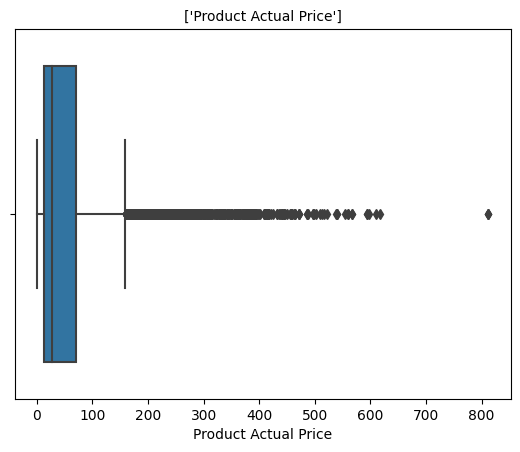

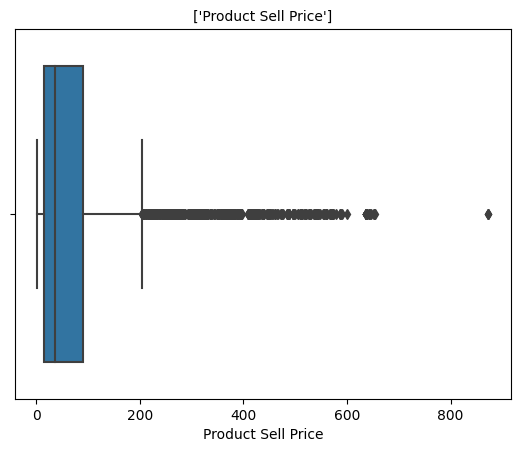

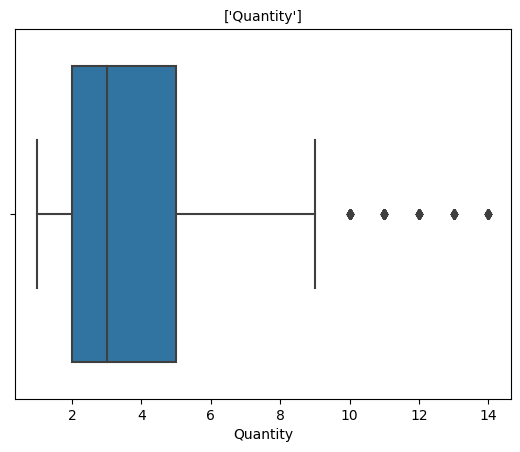

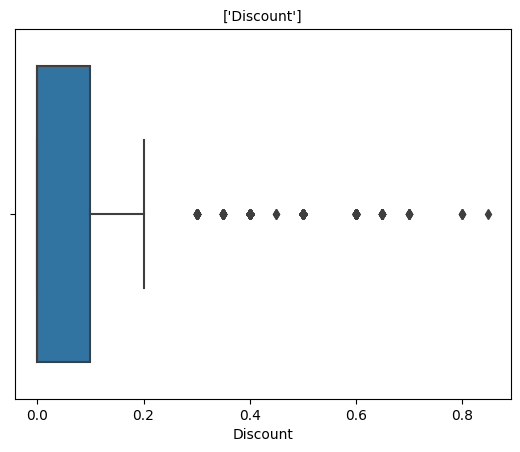

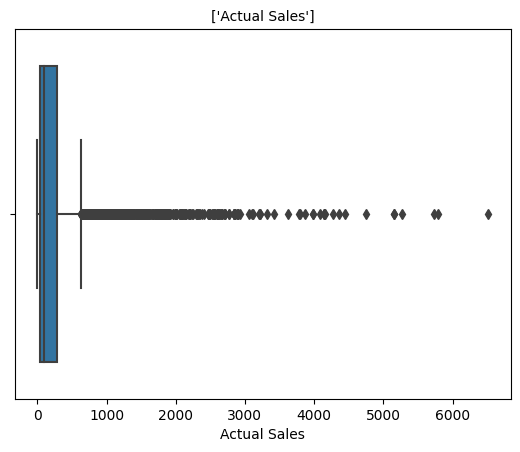

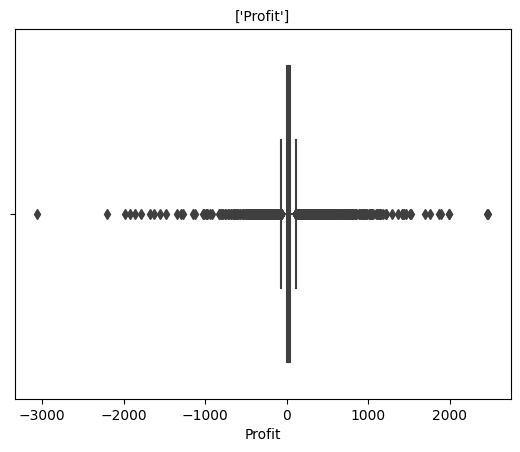

In [20]:
# plt.figure(figsize = (24,48))
for i in df1.select_dtypes(include = ['int64','float64']):
    sns.boxplot(x= df1[i])
    plt.title([i], size = 10)
    plt.show()

In [21]:
#Calculate percentiles of value and removing outliers from data frame Numpy library

Stats_det = {}

for i in df1.select_dtypes(['int','float']):

    df_d = df1[i]

    df_25 = np.quantile(df_d, 0.25)
    print('25th percentile of',i,'column:', df_25)

    df_75 = np.quantile(df_d, 0.75)
    print('75th percentile of',i,'column:', df_75)
    print('\n')

    df_iqr = df_75 -df_25
    print('IOR of value for the', i ,'column is:', df_iqr)
    print('\n')

    lower_limit = df_25-1.5*df_iqr
    print(i,'column lower limit',lower_limit)
    # print('\n')

    upper_limit = df_75+1.5*df_iqr
    print(i,'column upper limit',upper_limit)
    print('\n')
    print('*-*'*20)
    Stats_det[i] = {'Column': i,
                '25th Percentile': df_25,
                '75th Percentile': df_75,
                'IQR': df_iqr,
                'Lower Limit': lower_limit,
                'Upper Limit': upper_limit}

Stats_det = pd.DataFrame(Stats_det)

25th percentile of Product Actual Price column: 12.2
75th percentile of Product Actual Price column: 71.2


IOR of value for the Product Actual Price column is: 59.0


Product Actual Price column lower limit -76.3
Product Actual Price column upper limit 159.7


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
25th percentile of Product Sell Price column: 15.67
75th percentile of Product Sell Price column: 91.0


IOR of value for the Product Sell Price column is: 75.33


Product Sell Price column lower limit -97.325
Product Sell Price column upper limit 203.995


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
25th percentile of Quantity column: 2.0
75th percentile of Quantity column: 5.0


IOR of value for the Quantity column is: 3.0


Quantity column lower limit -2.5
Quantity column upper limit 9.5


*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
25th percentile of Discount column: 0.0
75th percentile of Discount column: 0.1


IOR of value for th

In [22]:
# #Calculate percentiles of value and removing outliers from data frame Numpy library

# Stats_list = []

# for i in df1.select_dtypes(['int','float']):

#     df_d = df1[i]

#     df_25 = np.quantile(df_d, 0.25)
#     print('25th percentile of',i,'column:', df_25)

#     df_75 = np.quantile(df_d, 0.75)
#     print('75th percentile of',i,'column:', df_75)
#     print('\n')

#     df_iqr = df_75 -df_25
#     print('IOR of value for the', i ,'column is:', df_iqr)
#     print('\n')

#     lower_limit = df_25-1.5*df_iqr
#     print(i,'column lower limit',lower_limit)
#     # print('\n')

#     upper_limit = df_75+1.5*df_iqr
#     print(i,'column upper limit',upper_limit)
#     print('\n')
#     print('*-*'*20)
#     Stats_det = {'Column': i,
#                 '25th Percentile': df_25,
#                 '75th Percentile': df_75,
#                 'IQR': df_iqr,
#                 'Lower Limit': lower_limit,
#                 'Upper Limit': upper_limit}
#     Stats_list.append(Stats_det)

# Stats_list

In [23]:
Stats_det.T

,Column,25th Percentile,75th Percentile,IQR,Lower Limit,Upper Limit
Product Actual Price,Product Actual Price,12.2,71.2,59.0,-76.3,159.7
Product Sell Price,Product Sell Price,15.67,91.0,75.33,-97.325,203.995
Quantity,Quantity,2.0,5.0,3.0,-2.5,9.5
Discount,Discount,0.0,0.1,0.1,-0.15,0.25
Actual Sales,Actual Sales,42.5,279.9,237.4,-313.6,636.0
Profit,Profit,1.0,47.0,46.0,-68.0,116.0


In [24]:
#dfn = df1[((df1['Discount'] >= -0.15) & (df1['Discount'] <= 0.25))]
dfn = df1[(df1['Discount'] <= df1['Discount'].quantile(0.95))]
dfp = df1[df1['Discount'] > df1['Discount'].quantile(0.95)]

In [25]:
df1[df1['Discount'] == 0.85]

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
1978,Central,Germany,Lower Saxony,Home Office,Economy Plus,Furniture,Tables,Bevis Conference Table,Fully Assembled,502.06,138.75,4,0.85,83.25,-1925


In [26]:
df1.shape

(8045, 15)

In [27]:
dfn.shape

(7925, 15)

In [28]:
dfp.shape

(120, 15)

In [29]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,7925.0,59.890331,82.587309,1.12,12.0,27.25,70.7,812.0
Product Sell Price,7925.0,77.928641,106.256701,2.11,15.5,36.50,97.0,873.0
Quantity,7925.0,3.770978,2.202728,1.00,2.0,3.00,5.0,14.0
Discount,7925.0,0.102385,0.171907,0.00,0.0,0.00,0.1,0.5
Actual Sales,7925.0,264.676057,452.172736,1.50,43.0,104.00,285.0,6517.0
Profit,7925.0,39.275584,171.054106,-3060.00,1.0,14.00,48.0,2476.0


In [30]:
dfn['Quantity'].quantile(0.985)

10.0

In [31]:
#dfp2 = dfn[dfn['Quantity'] > 9.5]
dfp2 = dfn[dfn['Quantity'] > dfn['Quantity'].quantile(0.985)]
dfp2.shape

(104, 15)

In [32]:
#dfn = dfn[((dfn['Quantity'] >= -2.5) & (dfn['Quantity'] <= 9.5))]
dfn = dfn[(dfn['Quantity'] <= dfn['Quantity'].quantile(0.985))]
dfn.shape

(7821, 15)

In [33]:
dfp.shape

(120, 15)

In [34]:
dfp = pd.concat([dfp,dfp2],ignore_index= True)
dfp.shape

(224, 15)

In [35]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,7821.0,59.846741,82.585947,1.12,12.0,27.23,70.8,812.0
Product Sell Price,7821.0,77.923283,106.329827,2.11,15.5,36.11,98.0,873.0
Quantity,7821.0,3.660146,1.990729,1.00,2.0,3.00,5.0,10.0
Discount,7821.0,0.102333,0.171834,0.00,0.0,0.00,0.1,0.5
Actual Sales,7821.0,257.150409,431.593874,1.50,43.0,102.50,276.0,5785.0
Profit,7821.0,38.928398,157.144535,-1783.00,1.0,14.00,47.0,2461.0


In [36]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,224.0,75.190893,92.002208,3.0,22.42,39.500,86.23,502.06
Product Sell Price,224.0,69.990580,84.798701,3.5,20.11,41.845,72.00,543.08
Quantity,224.0,7.687500,4.511135,1.0,3.00,8.000,12.00,14.00
Discount,224.0,0.380357,0.284846,0.0,0.00,0.600,0.60,0.85
Actual Sales,224.0,435.012277,852.334453,3.2,38.30,135.350,409.60,6517.00
Profit,224.0,-94.897321,511.215612,-3060.0,-160.25,-49.000,41.00,2476.00


In [37]:
# dfn['Sales'].quantile(0.95)

In [38]:
# #dfp2 = dfn[dfn['Quantity'] > 9.5]
# dfp3 = dfn[dfn['Sales'] > dfn['Sales'].quantile(0.95)]
# dfp3.shape

In [39]:
# #dfn = dfn[((dfn['Quantity'] >= -2.5) & (dfn['Quantity'] <= 9.5))]
# dfn = dfn[(dfn['Sales'] <= dfn['Sales'].quantile(0.95))]
# dfn.shape

In [40]:
# dfp = pd.concat([dfp,dfp3],ignore_index= True)
# dfp.shape

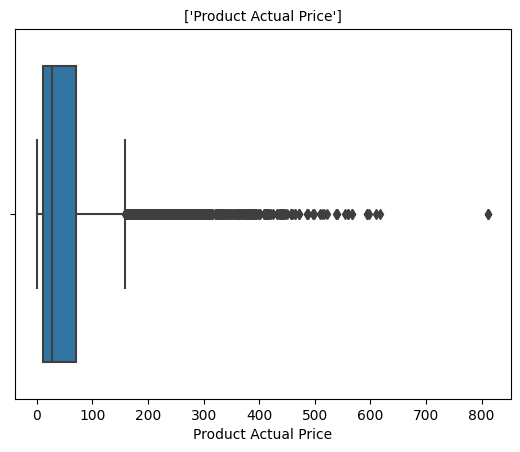

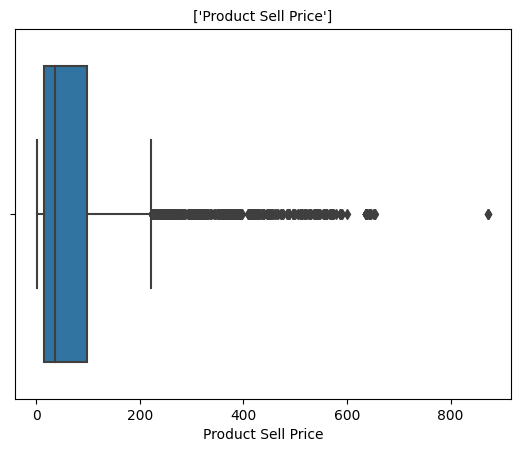

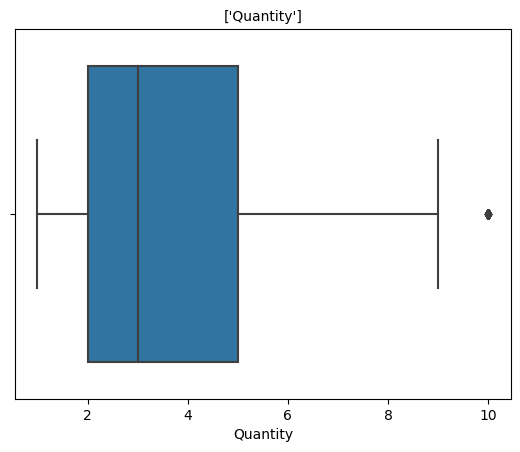

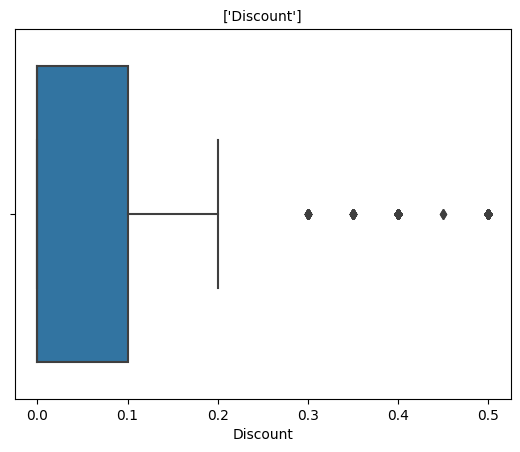

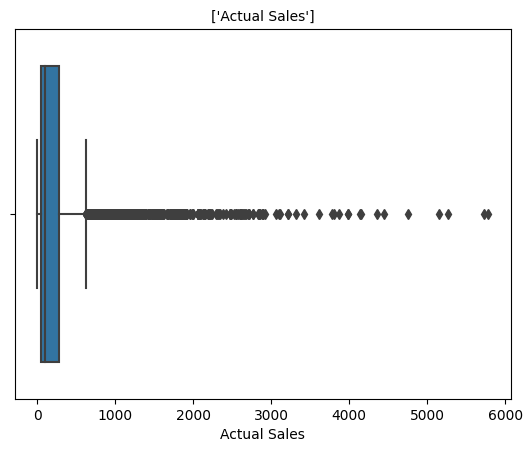

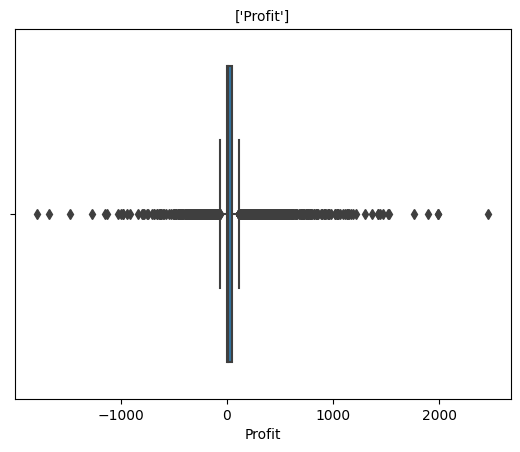

In [41]:
# plt.figure(figsize = (24,48))
for i in dfn.select_dtypes(include = ['int64','float64']):
    sns.boxplot(x= dfn[i])
    plt.title([i], size = 10)
    plt.show()

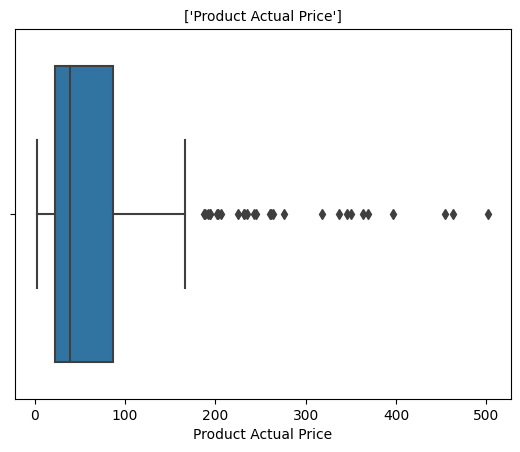

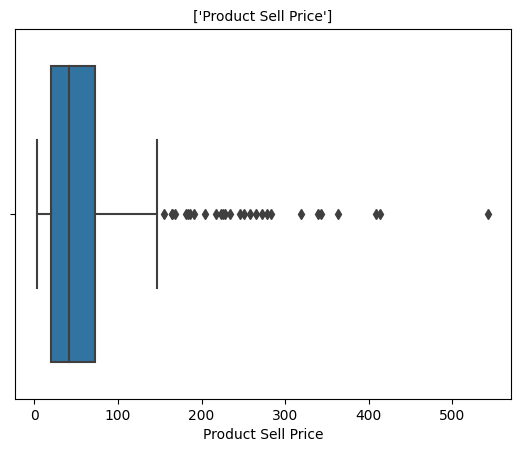

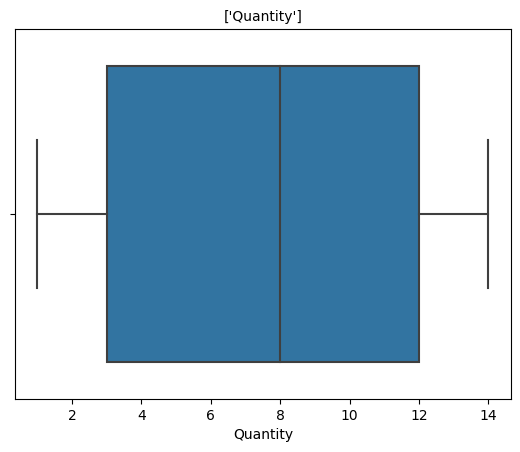

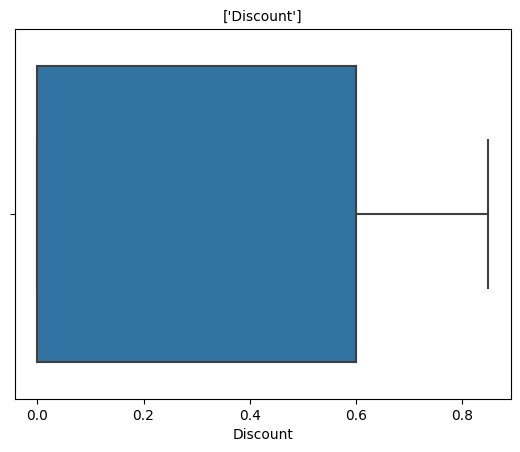

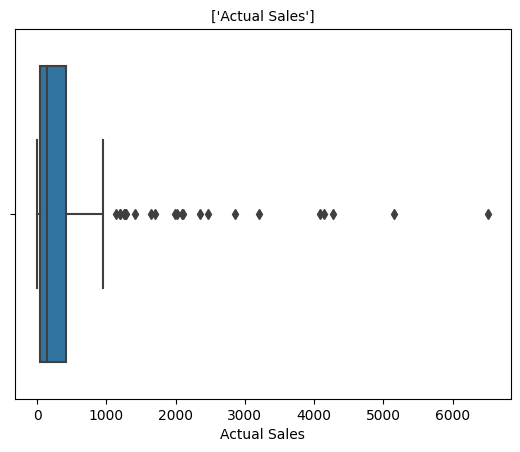

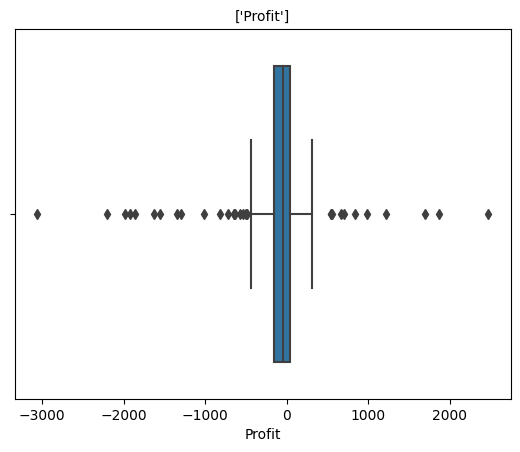

In [42]:
# plt.figure(figsize = (24,48))
for i in dfp.select_dtypes(include = ['int64','float64']):
    sns.boxplot(x= dfp[i])
    plt.title([i], size = 10)
    plt.show()

In [43]:
dfp.head(3)

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,Central,France,Languedoc-Roussillon-Midi-Pyrénées,Consumer,Economy,Furniture,Bookcases,Ikea Classic Bookcase,Metal,234.47,164.5,6,0.6,394.8,-1012
1,South,Spain,Murcia,Consumer,Economy,Furniture,Tables,Bevis Training Table,with Bottom Storage,224.60,134.0,2,0.6,107.2,-342
2,South,Italy,Emilia-Romagna,Consumer,Priority,Furniture,Chairs,Harbour Creations Swivel Stool,Set of Two,86.20,73.0,1,0.6,29.2,-57


In [44]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,7821.0,59.846741,82.585947,1.12,12.0,27.23,70.8,812.0
Product Sell Price,7821.0,77.923283,106.329827,2.11,15.5,36.11,98.0,873.0
Quantity,7821.0,3.660146,1.990729,1.00,2.0,3.00,5.0,10.0
Discount,7821.0,0.102333,0.171834,0.00,0.0,0.00,0.1,0.5
Actual Sales,7821.0,257.150409,431.593874,1.50,43.0,102.50,276.0,5785.0
Profit,7821.0,38.928398,157.144535,-1783.00,1.0,14.00,47.0,2461.0


In [45]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Product Actual Price,224.0,75.190893,92.002208,3.0,22.42,39.500,86.23,502.06
Product Sell Price,224.0,69.990580,84.798701,3.5,20.11,41.845,72.00,543.08
Quantity,224.0,7.687500,4.511135,1.0,3.00,8.000,12.00,14.00
Discount,224.0,0.380357,0.284846,0.0,0.00,0.600,0.60,0.85
Actual Sales,224.0,435.012277,852.334453,3.2,38.30,135.350,409.60,6517.00
Profit,224.0,-94.897321,511.215612,-3060.0,-160.25,-49.000,41.00,2476.00


In [46]:
from sklearn.preprocessing import LabelEncoder
LBE = LabelEncoder()

In [47]:
#importing LabelEncoder module from sklearn library
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder for each column
LBE = {}

enc_df1 = df1.copy()

#running for loop for creating object of labelencoder class for each categorical column and saving them using pickle module for future use
for col in df1.select_dtypes('object'):
    LBE[col] = LabelEncoder()
    enc_df1[col] = LBE[col].fit_transform(df1[col])
    
    pk.dump(LBE[col], open(f"{col}_LBE.pkl" , 'wb'))

In [48]:
df1.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,North,Sweden,Stockholm,Home Office,Economy Plus,Office Supplies,Paper,Enermax Note Cards,Premium,16.17,15.00,3,0.5,22.5,-26
1,North,United Kingdom,England,Consumer,Economy,Furniture,Bookcases,Dania Corner Shelving,Traditional,80.57,122.00,7,0.0,854.0,290
2,Central,France,Auvergne-Rhône-Alpes,Consumer,Economy,Office Supplies,Art,Binney & Smith Sketch Pad,Easy-Erase,39.67,46.67,3,0.0,140.0,21
3,North,United Kingdom,England,Corporate,Economy,Office Supplies,Art,Boston Markers,Easy-Erase,17.75,13.50,2,0.5,13.5,-22
4,North,United Kingdom,England,Corporate,Economy,Office Supplies,Storage,Eldon Folders,Single Width,4.75,8.50,2,0.5,8.5,-1


In [49]:
enc_df1.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,1,12,103,2,1,1,12,188,33,16.17,15.00,3,0.5,22.5,-26
1,1,14,41,0,0,0,4,146,45,80.57,122.00,7,0.0,854.0,290
2,0,4,7,0,0,1,2,83,18,39.67,46.67,3,0.0,140.0,21
3,1,14,41,1,0,1,2,86,18,17.75,13.50,2,0.5,13.5,-22
4,1,14,41,1,0,1,14,166,43,4.75,8.50,2,0.5,8.5,-1


In [50]:
unsc_enc_df1 = enc_df1.drop('Profit',axis=1)  # dataframe
print(type(unsc_enc_df1))
print(unsc_enc_df1.shape)

<class 'pandas.core.frame.DataFrame'>
(8045, 14)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(unsc_enc_df1)
df1_enc_sc = scaler.transform(unsc_enc_df1)

In [52]:
df1_enc_sc = pd.DataFrame(df1_enc_sc ,columns=unsc_enc_df1.columns,index=unsc_enc_df1.index)
df1_enc_sc.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales
0,0.397510,1.180953,1.342228,1.795773,0.240822,-0.060582,0.952878,-0.405530,0.497619,-0.532081,-0.592724,-0.350484,2.145092,-0.533034
1,0.397510,1.679720,-0.561203,-0.864815,-0.683517,-1.770697,-0.681469,-0.676263,1.285886,0.244856,0.418744,1.464833,-0.605552,1.316768
2,-0.824955,-0.814116,-1.605019,-0.864815,-0.683517,-0.060582,-1.090056,-1.082363,-0.487715,-0.248571,-0.293349,-0.350484,-0.605552,-0.271636
3,0.397510,1.679720,-0.561203,0.465479,-0.683517,-0.060582,-1.090056,-1.063025,-0.487715,-0.513019,-0.606904,-0.804313,2.145092,-0.553056
4,0.397510,1.679720,-0.561203,0.465479,-0.683517,-0.060582,1.361465,-0.547343,1.154508,-0.669855,-0.654168,-0.804313,2.145092,-0.564179


In [53]:
# Encode the categorical columns
enc_dfn = dfn.copy()

for i in enc_dfn.select_dtypes('object'):
    #Loading Encoder
    #LBE[i] = pk.load(open(f'{i}_LBE.pkl', "rb"))  # rb = read binary
    enc_dfn[i] = LBE[i].transform(enc_dfn[i])

In [54]:
dfn.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,North,Sweden,Stockholm,Home Office,Economy Plus,Office Supplies,Paper,Enermax Note Cards,Premium,16.17,15.00,3,0.5,22.5,-26
1,North,United Kingdom,England,Consumer,Economy,Furniture,Bookcases,Dania Corner Shelving,Traditional,80.57,122.00,7,0.0,854.0,290
2,Central,France,Auvergne-Rhône-Alpes,Consumer,Economy,Office Supplies,Art,Binney & Smith Sketch Pad,Easy-Erase,39.67,46.67,3,0.0,140.0,21
3,North,United Kingdom,England,Corporate,Economy,Office Supplies,Art,Boston Markers,Easy-Erase,17.75,13.50,2,0.5,13.5,-22
4,North,United Kingdom,England,Corporate,Economy,Office Supplies,Storage,Eldon Folders,Single Width,4.75,8.50,2,0.5,8.5,-1


In [55]:
enc_dfn.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
0,1,12,103,2,1,1,12,188,33,16.17,15.00,3,0.5,22.5,-26
1,1,14,41,0,0,0,4,146,45,80.57,122.00,7,0.0,854.0,290
2,0,4,7,0,0,1,2,83,18,39.67,46.67,3,0.0,140.0,21
3,1,14,41,1,0,1,2,86,18,17.75,13.50,2,0.5,13.5,-22
4,1,14,41,1,0,1,14,166,43,4.75,8.50,2,0.5,8.5,-1


In [56]:
dfn_unscale = enc_dfn.drop('Profit',axis=1)  # dataframe
y = enc_dfn['Profit']              # series
print(type(dfn_unscale))
print(type(y))
print(dfn_unscale.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(7821, 14) (7821,)


In [57]:
dfn_enc_scl = scaler.transform(dfn_unscale)
x = pd.DataFrame(dfn_enc_scl ,columns=dfn_unscale.columns,index=dfn_unscale.index)
x.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales
0,0.397510,1.180953,1.342228,1.795773,0.240822,-0.060582,0.952878,-0.405530,0.497619,-0.532081,-0.592724,-0.350484,2.145092,-0.533034
1,0.397510,1.679720,-0.561203,-0.864815,-0.683517,-1.770697,-0.681469,-0.676263,1.285886,0.244856,0.418744,1.464833,-0.605552,1.316768
2,-0.824955,-0.814116,-1.605019,-0.864815,-0.683517,-0.060582,-1.090056,-1.082363,-0.487715,-0.248571,-0.293349,-0.350484,-0.605552,-0.271636
3,0.397510,1.679720,-0.561203,0.465479,-0.683517,-0.060582,-1.090056,-1.063025,-0.487715,-0.513019,-0.606904,-0.804313,2.145092,-0.553056
4,0.397510,1.679720,-0.561203,0.465479,-0.683517,-0.060582,1.361465,-0.547343,1.154508,-0.669855,-0.654168,-0.804313,2.145092,-0.564179


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5865, 14)
(1956, 14)
(5865,)
(1956,)


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
d = {'Model':[],'MAE':[],'MSE':[],'RMSE':[],'R2_SCORE':[],'Train_Score':[],'Test_Score':[]}

def eval_model(model,model_name,x_train,y_train,x_test,y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mean_squared_error(y_test,y_pred))
    r2s = r2_score(y_test, y_pred)
    Train_Score = model.score(x_train, y_train)
    Test_Score = model.score(x_test, y_test)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2_Score:', r2s)
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy
    d['Model'].append(model_name)
    d['MAE'].append(mae)
    d['MSE'].append(mse)
    d['RMSE'].append(rmse)
    d['R2_SCORE'].append(r2s)
    d['Train_Score'].append(Train_Score)
    d['Test_Score'].append(Test_Score)
    

    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

In [62]:
def reg_eval_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mean_squared_error(y_test,y_pred))
    r2s = r2_score(y_test, y_pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2_Score:', r2s)

def train_test_score(model):
    print('Training_Score:', model.score(x_train, y_train))
    print('Testing_Score:', model.score(x_test, y_test))

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
m0 = LinearRegression()
m0.fit(x_train,y_train)
y_pred0 = m0.predict(x_test)
print(y_pred0)
train_test_score(m0)

[-40.68382286 -18.50220719 -66.53851819 ... -73.40182927  27.95724885
  22.05062842]
Training_Score: 0.7976561344594784
Testing_Score: 0.8006816506285326


In [65]:
eval_model(m0, 'LinearRegression',x_train, y_train,x_test,y_test, y_pred0)

MAE: 33.64349667486633
MSE: 5281.415296844336
RMSE: 72.67334653670723
R2_Score: 0.8006816506285326
Training Score 0.7976561344594784
Testing Score 0.8006816506285326


In [66]:
# Importing KFold from sklearn.model_selection
from sklearn.model_selection import KFold
# Importing cross_val_score from sklearn.model_selection
from sklearn.model_selection import cross_val_score

In [67]:
# Initializing LinearRegression()
regressor = LinearRegression()
# Initializing KFold () and setting n_splits=5, random_state=2022 and shuffle=True
kfold = KFold(n_splits=13, random_state=1,shuffle=True)
# Applying the regressor and calculating result using cross_val_score() method and setting  cv=kfold, scoring='r2'
results = cross_val_score(regressor, x, y, cv=kfold, scoring='r2')
# Assigning a variable R2 to the result 
R2 = results

In [68]:
print(R2)
print("R-Squared: %.2f" % (R2.mean()))

[0.86020017 0.79611652 0.7550606  0.84373119 0.77929721 0.67011932
 0.81653138 0.84867684 0.69447685 0.83761358 0.79426437 0.76844184
 0.85787672]
R-Squared: 0.79


In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
m1 = KNeighborsRegressor(n_neighbors= 3 )
m1.fit(x_train,y_train)
y_pred1 = m1.predict(x_test)
print(y_pred1)
train_test_score(m1)

[-51.33333333   6.         -30.33333333 ... -49.66666667  62.33333333
  28.        ]


Training_Score: 0.7831109252748727
Testing_Score: 0.6892049914605707


In [71]:
eval_model(m1, 'KNeighborsRegressor',x_train, y_train,x_test,y_test, y_pred1)

MAE: 43.282208588957054
MSE: 8235.255396500796
RMSE: 90.74830795392714
R2_Score: 0.6892049914605707
Training Score 0.7831109252748727
Testing Score 0.6892049914605707


In [72]:
from sklearn.linear_model import Ridge, Lasso

In [73]:
m2 = Ridge(alpha=0.2)
m2.fit(x_train, y_train)
y_pred2 = m2.predict(x_test)
print(y_pred2)
train_test_score(m2)

[-40.7200734  -18.48667641 -66.5376073  ... -73.41427157  27.97624556
  22.06151777]
Training_Score: 0.7976558975847373
Testing_Score: 0.8006723298221499


In [74]:
eval_model(m2, 'Ridge',x_train, y_train,x_test,y_test, y_pred2)

MAE: 33.640924752141366
MSE: 5281.66227385154
RMSE: 72.67504574371824
R2_Score: 0.8006723298221499
Training Score 0.7976558975847373
Testing Score 0.8006723298221499


In [75]:
m3 = Lasso(alpha=0.1)
m3.fit(x_train, y_train)
y_pred3 = m3.predict(x_test)
print(y_pred3)
train_test_score(m3)

[-40.75305944 -18.6741153  -66.77076197 ... -73.69003869  27.96866975
  22.08944315]
Training_Score: 0.7976292577267318
Testing_Score: 0.8005384108882496


In [76]:
eval_model(m3, 'Lasso',x_train, y_train,x_test,y_test, y_pred3)

MAE: 33.52543353657546
MSE: 5285.210775573875
RMSE: 72.69945512570142
R2_Score: 0.8005384108882496
Training Score 0.7976292577267318
Testing Score 0.8005384108882496


In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#import numpy as np

# Define the parameter grid with loops for specific increments
param_grid = {

    'max_depth': np.arange(1,20,1),
    'min_samples_split': np.arange(2,40,1),
    'random_state' : [1]
}

# Create the RandomForestRegressor
# rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator= DecisionTreeRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and modelc
best_params = grid_search.best_params_
print(best_params)
best_model = grid_search.best_estimator_
print(best_model)

{'max_depth': 18, 'min_samples_split': 5, 'random_state': 1}
DecisionTreeRegressor(max_depth=18, min_samples_split=5, random_state=1)


In [79]:
m4 = DecisionTreeRegressor(max_depth= 16, min_samples_split= 17, random_state= 1)# 
m4.fit(x_train, y_train)
y_pred4 = m4.predict(x_test)
print(y_pred4)
train_test_score(m4)

[ -2.1875  -7.     -18.     ... -54.5     18.       7.4   ]
Training_Score: 0.9004091490367534
Testing_Score: 0.7784170647828428


In [80]:
eval_model(m4, 'DecisionTreeRegressor',x_train, y_train,x_test,y_test, y_pred4)

MAE: 26.107140830227486
MSE: 5871.36862845748
RMSE: 76.62485646614601
R2_Score: 0.7784170647828428
Training Score 0.9004091490367534
Testing Score 0.7784170647828428


In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
m5 = RandomForestRegressor(n_estimators= 50, max_depth=15,min_samples_split=3, random_state= 42) #n_estimators= 50, max_depth=15,min_samples_split=50, random_state= 42
m5.fit(x_train, y_train)
y_pred5 = m5.predict(x_test)
print(y_pred5)
train_test_score(m5)

[-10.27786219  -4.9240873  -19.79570513 ... -47.9064359   27.27624391
   8.75813809]
Training_Score: 0.9732699191694563
Testing_Score: 0.9208211644983515


In [83]:
eval_model(m5, 'RandomForestRegressor',x_train, y_train,x_test,y_test, y_pred5)

MAE: 16.271333789814662
MSE: 2098.0321898280276
RMSE: 45.804281348232365
R2_Score: 0.9208211644983515
Training Score 0.9732699191694563
Testing Score 0.9208211644983515


In [84]:
# #from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# #import numpy as np

# # Define the parameter grid with loops for specific increments
# param_grid = {
#     #'n_estimators': np.arange(100, 300, 10),   # Start at 100, end at 500 (inclusive), increment by 100
#     'max_depth': np.arange(1, 20),             # Start at 1, end at 100 (inclusive), increment by 1
#     'min_samples_split': np.arange(2, 20),     # Start at 2, end at 100 (inclusive), increment by 1
#     # 'min_samples_leaf': [1, 2, 4],
#     #'max_features': np.arange(0.1, 1.1, 0.1)    # Generate values from 0.1 to 1.0 with 0.1 increment
# }

# # Create the RandomForestRegressor
# # rf = RandomForestRegressor()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator= RandomForestRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit the grid search to the data
# grid_search.fit(x_train, y_train)

# # Get the best parameters and modelc
# best_params = grid_search.best_params_
# print(best_params)
# best_model = grid_search.best_estimator_
# print(best_model)

In [85]:
from sklearn.ensemble import BaggingRegressor

In [86]:
m6 = BaggingRegressor(n_estimators= 20,random_state= 1)#estimator=RandomForestRegressor(),
m6.fit(x_train, y_train)
y_pred6 = m6.predict(x_test)
print(y_pred6)
train_test_score(m6)

[-15.95  -7.9  -19.95 ... -56.3   26.8    9.  ]
Training_Score: 0.9730665029723427
Testing_Score: 0.9140607791107808


In [87]:
eval_model(m6, 'BaggingRegressor',x_train, y_train,x_test,y_test, y_pred6)

MAE: 16.58392126789366
MSE: 2277.16473287321
RMSE: 47.71964724170968
R2_Score: 0.9140607791107808
Training Score 0.9730665029723427
Testing Score 0.9140607791107808


In [88]:
from sklearn.ensemble import AdaBoostRegressor

In [89]:
m7 = AdaBoostRegressor(estimator=RandomForestRegressor(),n_estimators=60,random_state=1)#estimator=DecisionTreeRegressor(),n_estimators=100,random_state=1
m7.fit(x_train, y_train)
y_pred7 = m7.predict(x_test)
print(y_pred7)
train_test_score(m7)

[-12.54  -1.61 -17.6  ... -46.72  37.1   10.22]
Training_Score: 0.9991733450384589
Testing_Score: 0.9303334521857521


In [90]:
eval_model(m7, 'AdaBoostRegressor',x_train, y_train,x_test,y_test, y_pred7)

MAE: 15.182597137014314
MSE: 1845.9814285276075
RMSE: 42.96488599458408
R2_Score: 0.9303334521857521
Training Score 0.9991733450384589
Testing Score 0.9303334521857521


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
m8 = GradientBoostingRegressor(n_estimators= 3000,random_state=1)#n_estimators= 6000, max_depth= 4,
m8.fit(x_train, y_train)
y_pred8 = m8.predict(x_test)
print(y_pred8)
train_test_score(m8)

[ -1.12012182 -11.20966681 -20.82666765 ... -43.01569703  26.88818894
   9.49490169]
Training_Score: 0.9998805021499453
Testing_Score: 0.9746091027850422


In [93]:
eval_model(m8, 'GradientBoostRegressor',x_train, y_train,x_test,y_test, y_pred8)

MAE: 7.520963207644008
MSE: 672.7924116096304
RMSE: 25.938242261372114
R2_Score: 0.9746091027850422
Training Score 0.9998805021499453
Testing Score 0.9746091027850422


In [94]:
model_performance = pd.DataFrame(d)
model_performance.round(2)

,Model,MAE,MSE,RMSE,R2_SCORE,Train_Score,Test_Score
0,LinearRegression,33.64,5281.42,72.67,0.80,0.80,0.80
1,KNeighborsRegressor,43.28,8235.26,90.75,0.69,0.78,0.69
2,Ridge,33.64,5281.66,72.68,0.80,0.80,0.80
3,Lasso,33.53,5285.21,72.70,0.80,0.80,0.80
4,DecisionTreeRegressor,26.11,5871.37,76.62,0.78,0.90,0.78
5,RandomForestRegressor,16.27,2098.03,45.80,0.92,0.97,0.92
6,BaggingRegressor,16.58,2277.16,47.72,0.91,0.97,0.91
7,AdaBoostRegressor,15.18,1845.98,42.96,0.93,1.00,0.93
8,GradientBoostRegressor,7.52,672.79,25.94,0.97,1.00,0.97


In [95]:
import pickle

In [96]:
pickle.dump(scaler, open('Data_Scaling.pkl', 'wb'))   # wb = write binary

In [97]:
test_model1 = GradientBoostingRegressor(n_estimators= 3000,random_state=1)
test_model1.fit(x,y)

GradientBoostingRegressor(n_estimators=3000, random_state=1)

In [98]:
pickle.dump(test_model1, open('profit_predict_model.pkl', 'wb'))   # wb = write binary

In [99]:
# Convert DataFrame to the desired nested dictionary structure
nested_dict = {}

for _, row in df1.iterrows():
    product = row['Product']
    feature = row['Product Feature']
    price = row['Product Actual Price']
    
    if product not in nested_dict:
        nested_dict[product] = {}
    
    if feature not in nested_dict[product]:
        nested_dict[product][feature] = []
    
    if price not in nested_dict[product][feature]:
        nested_dict[product][feature].append(price)

print(nested_dict)


{'Enermax Note Cards': {' Premium': [16.17, 16.25, 23.67, 23.5, 25.8, 25.67, 25.75, 24.0], ' 8.5 x 11': [16.33, 16.5, 14.1], ' Multicolor': [26.0, 25.67, 23.05, 25.78]}, 'Dania Corner Shelving': {' Traditional': [80.57, 69.53, 80.6, 80.67, 80.5], ' Metal': [53.49, 34.0], ' Mobile': [68.48, 77.38, 77.13, 88.43], ' Pine': [110.0]}, 'Binney & Smith Sketch Pad': {' Easy-Erase': [39.67, 39.5, 39.57, 39.6, 27.88], ' Blue': [22.8, 34.5, 34.33, 34.36, 34.38, 34.4, 22.67, 22.75, 34.25, 30.17], ' Water Color': [33.0, 33.2, 33.12, 33.33, 33.25, 28.8, 20.8, 21.0, 34.0, 20.67], ' Fluorescent': [45.17, 45.0, 40.98]}, 'Boston Markers': {' Easy-Erase': [17.75, 22.1, 24.0, 24.5, 24.2, 24.14], ' Fluorescent': [24.0, 23.67, 23.43, 23.5, 21.17, 16.62], ' Water Color': [29.5, 29.67, 30.0, 29.6], ' Blue': [15.6, 15.5, 15.67, 15.0, 8.5, 9.0]}, 'Eldon Folders': {' Single Width': [4.75, 4.93, 4.92, 7.47, 7.48, 4.87, 5.0, 9.0], ' Wire Frame': [13.05, 14.33, 14.4, 10.0, 14.5, 12.9], ' Blue': [12.61, 14.0, 12.47,

In [102]:
for _, row in df1.iterrows():
    print(row[4])
    product = row['Product']
    feature = row['Product Feature']
    price = row['Product Actual Price']
    print(product,feature,price,'\n')

Economy Plus
Enermax Note Cards  Premium 16.17 

Economy
Dania Corner Shelving  Traditional 80.57 

Economy
Binney & Smith Sketch Pad  Easy-Erase 39.67 

Economy
Boston Markers  Easy-Erase 17.75 

Economy
Eldon Folders  Single Width 4.75 

Priority
Binney & Smith Pencil Sharpener  Water Color 23.0 

Priority
Sanford Canvas  Fluorescent 32.5 

Priority
Bush Floating Shelf Set  Pine 103.5 

Priority
Accos Thumb Tacks  Assorted Sizes 10.33 

Priority
Smead Lockers  Industrial 125.35 

Economy
Ikea Classic Bookcase  Metal 234.47 

Economy
Binney & Smith Sketch Pad  Blue 22.8 

Economy
Ibico Hole Reinforcements  Recycled 5.0 

Economy
Boston Canvas  Fluorescent 45.0 

Economy
Smead Trays  Single Width 33.0 

Economy
Bevis Training Table  with Bottom Storage 224.6 

Economy
Novimex File Folder Labels  Alphabetical 6.8 

Immediate
SAFCO Executive Leather Armchair  Red 456.67 

Immediate
Binney & Smith Canvas  Blue 41.5 

Economy
Ikea Stackable Bookrack  Traditional 66.36 

Economy
Binney & Sm

In [103]:
sampledf = df1.sample(30) 
sampledf

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales,Profit
1811,Central,Germany,Berlin,Consumer,Economy,Office Supplies,Art,Boston Pens,Blue,12.70,13.00,2,0.1,23.4,-2
6038,Central,France,Provence-Alpes-Côte d'Azur,Consumer,Priority,Office Supplies,Storage,Smead Shelving,Industrial,33.05,44.50,2,0.1,80.1,14
707,South,Italy,Trentino-Alto Adige,Corporate,Economy Plus,Office Supplies,Binders,Cardinal Binder,Economy,8.60,13.80,5,0.0,69.0,26
4767,South,Portugal,Porto,Consumer,Economy,Office Supplies,Storage,Smead Shelving,Single Width,14.50,24.33,3,0.5,36.5,-7
809,North,Finland,Uusimaa,Corporate,Economy,Office Supplies,Labels,Hon Round Labels,Adjustable,3.00,4.50,2,0.0,9.0,3
4077,North,United Kingdom,England,Corporate,Economy,Office Supplies,Art,Binney & Smith Sketch Pad,Water Color,28.80,44.50,4,0.1,160.2,45
1630,Central,Germany,Bremen,Consumer,Economy,Office Supplies,Art,Sanford Pencil Sharpener,Easy-Erase,13.57,27.14,7,0.0,190.0,95
7190,North,United Kingdom,England,Corporate,Economy,Furniture,Bookcases,Bush Stackable Bookrack,Traditional,92.50,123.00,2,0.0,246.0,61
5010,South,Italy,Lazio,Consumer,Economy Plus,Office Supplies,Appliances,Hoover Microwave,Silver,157.67,309.33,6,0.0,1856.0,910
1982,Central,Germany,Saxony,Consumer,Economy Plus,Office Supplies,Binders,Acco Index Tab,Economy,3.00,5.00,2,0.5,5.0,-1


In [104]:
# Encode the categorical columns
enc_sampledf = sampledf.copy()

for i in enc_sampledf.select_dtypes('object'):
    #Loading Encoder
    #LBE[i] = pk.load(open(f'{i}_LBE.pkl', "rb"))  # rb = read binary
    enc_sampledf[i] = LBE[i].transform(enc_sampledf[i])

In [107]:
sampledf_unscale = enc_sampledf.drop('Profit',axis=1)  # dataframe
sample_y = enc_sampledf['Profit']              # series
print(type(sampledf_unscale))
print(type(sample_y))
print(sampledf_unscale.shape,sample_y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(30, 14) (30,)


In [108]:
sampledf_enc_scl = scaler.transform(sampledf_unscale)
sample_x = pd.DataFrame(sampledf_enc_scl ,columns=sampledf_unscale.columns,index=sampledf_unscale.index)
sample_x.head()

,Region,Country,State,Segment,Ship Mode,Category,Sub-Category,Product,Product Feature,Product Actual Price,Product Sell Price,Quantity,Discount,Actual Sales
1811,-0.824955,-0.564732,-1.359415,-0.864815,-0.683517,-0.060582,-1.090056,-1.050132,-1.144604,-0.573944,-0.611630,-0.804313,-0.055423,-0.531031
6038,-0.824955,-0.814116,0.851020,-0.864815,2.089502,-0.060582,1.361465,1.289773,0.037797,-0.328437,-0.313861,-0.804313,-0.055423,-0.404893
707,1.619976,-0.065965,1.465029,0.465479,0.240822,-0.060582,-0.885762,-0.837414,-0.422026,-0.623407,-0.604068,0.557175,-0.605552,-0.429587
4767,1.619976,0.682186,0.820319,-0.864815,-0.683517,-0.060582,1.361465,1.289773,1.154508,-0.552228,-0.504528,-0.350484,2.145092,-0.501888
809,0.397510,-1.063499,1.679933,0.465479,-0.683517,-0.060582,0.544291,0.071475,-1.473049,-0.690967,-0.691980,-0.804313,-0.605552,-0.563066


In [110]:
sample_ypred = test_model1.predict(sample_x)
print(sample_ypred)

[-2.52804163e+00  1.41207675e+01  2.54967916e+01 -7.08095845e+00
  2.65332358e+00  4.32600592e+01  9.45651842e+01  6.23195213e+01
  9.12110564e+02  2.22298435e-01  1.33819891e+02  3.71641643e+01
 -5.70620099e+00 -1.34762409e+01  5.00022266e+00  6.66175575e+00
  5.68806195e+00  1.27382873e+02  7.62077319e+00  6.06721239e+00
 -4.94983886e+00  5.97848403e+01  8.72732737e+01  2.61851942e+01
  1.79050842e+01  1.31133490e+01 -5.00826919e+00 -7.24438515e-01
  2.69273089e+01  2.15618176e+01]


In [111]:
def reg_eval_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse =np.sqrt(mean_squared_error(y_test,y_pred))
    r2s = r2_score(y_test, y_pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2_Score:', r2s)

def train_test_score(model):
    print('Training_Score:', model.score(x_train, y_train))
    print('Testing_Score:', model.score(x_test, y_test))

In [112]:
reg_eval_metrics(sample_y,sample_ypred)

MAE: 1.7744647338617672
MSE: 15.027905576885892
RMSE: 3.8765842667077277
R2_Score: 0.9994361876328591


In [114]:
print(test_model1.score(x,y))
print(test_model1.score(sample_x,sample_y))

0.9998372989690038
0.9994361876328591


In [115]:
pk.dump(sample_x,open('Sample_data.pkl','wb'))